In [1]:
%matplotlib inline
import simple_simulation
import numpy as np
import matplotlib.pyplot as plt
import cosmology

0.048252


In [2]:
simpleCatalog=np.array([[0.,.9,1.,0.]])
simulationDefault=simple_simulation.HexDishArray(nSide=5,dAnt=4.,dAntPos=6.,nDays=1)
simulationDefault.setSourceList(simpleCatalog)
simulationDefault.gridDays()
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()

simple_simulation.py:203: RuntimeWarning: invalid value encountered in divide
  ftTemp=self.dataCube*windowCube/self.sampleCube
simple_simulation.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  counts[binNum]+=1
simple_simulation.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=np.abs(ftVis[nt/2:,uNum])**2.
simple_simulation.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dGrid[:,binNum]+=np.abs(np.flipud(ftVis[:nt/2,uNum]))**2.


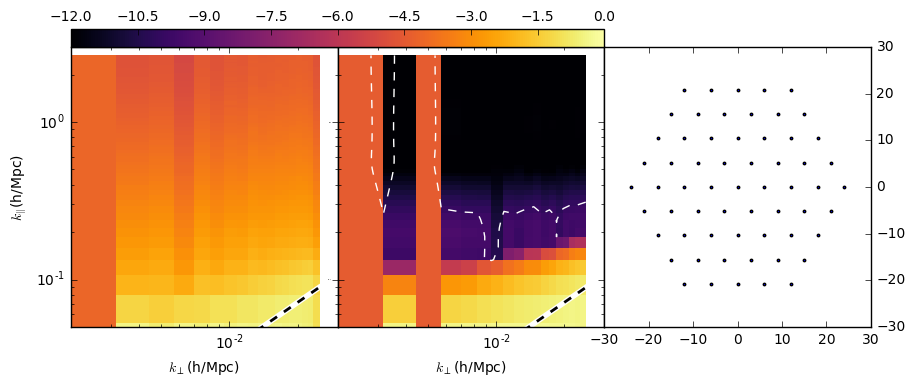

In [3]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
ax1.grid(b='on')
ax1.grid(b='on',which='minor')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
ax1.grid()
ax1.grid(which='minor')
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
plt.gcf().set_size_inches((10,3.5))

/Users/aaronew/miniconda2/envs/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide
/Users/aaronew/miniconda2/envs/analysis/lib/python2.7/site-packages/numpy/ma/core.py:3136: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


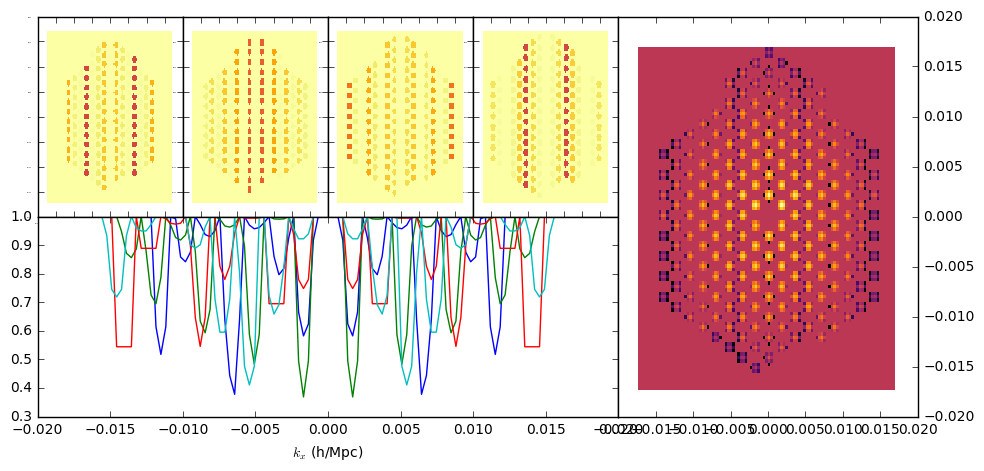

In [4]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
fig.set_size_inches([11,5])

Try perturbing the positions of the defaultSimulation Cube

In [5]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.)
simulationDefault.gridDays(1,2)
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()

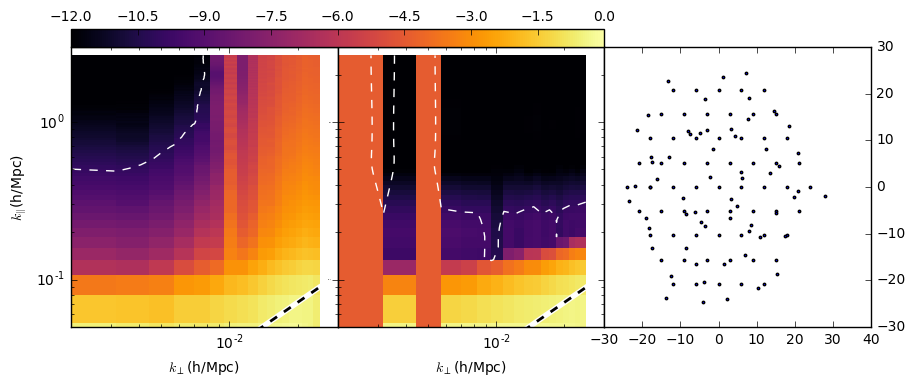

In [6]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
plt.gcf().set_size_inches((10,3.5))

/Users/aaronew/miniconda2/envs/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


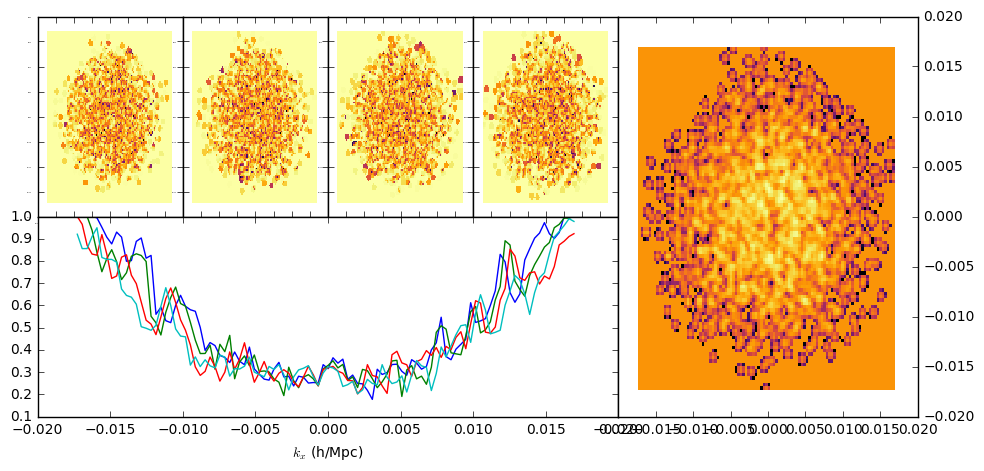

In [7]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
fig.set_size_inches([11,5])

In [8]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=10)
simulationDefault.gridDays(startDay=1,endDay=11)
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()

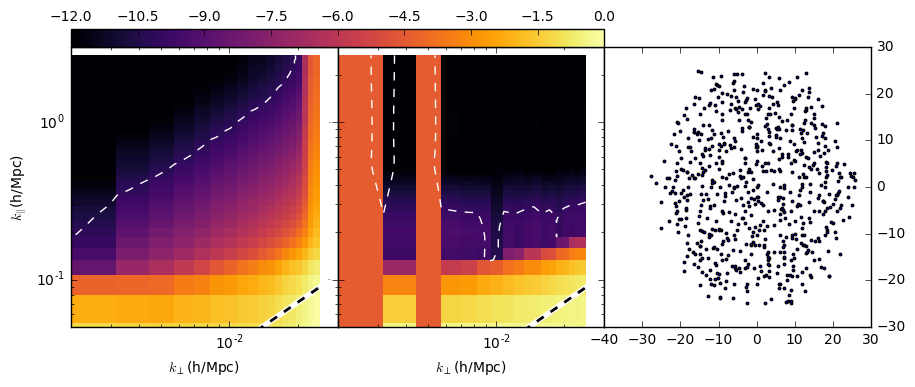

In [9]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
plt.gcf().set_size_inches((10,3.5))

/Users/aaronew/miniconda2/envs/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


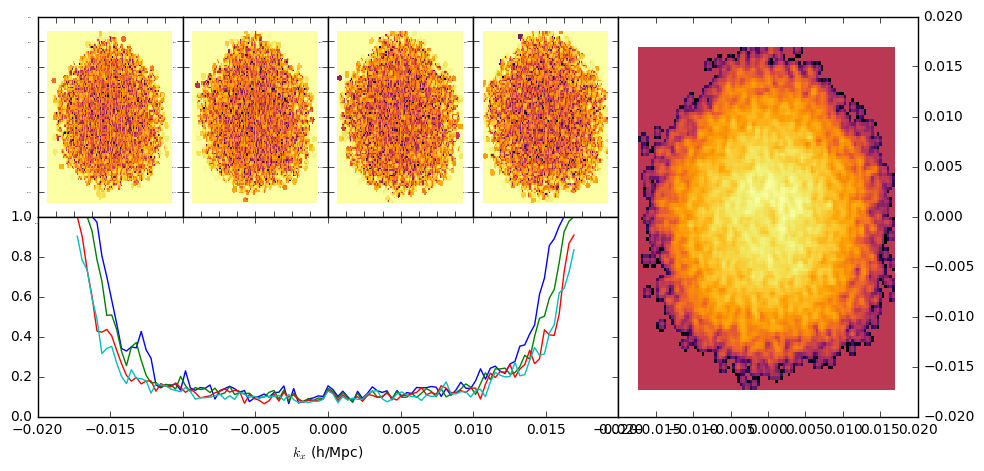

In [10]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
fig.set_size_inches([11,5])

In [11]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=30)
simulationDefault.gridDays(startDay=1,endDay=31)
kperp_c,kpara_c,cubeGrid=simulationDefault.getCosmologyDCubeGrid()
kperp_dt,kpara_dt,cubeDGrid=simulationDefault.getCosmologyDVisGrid()

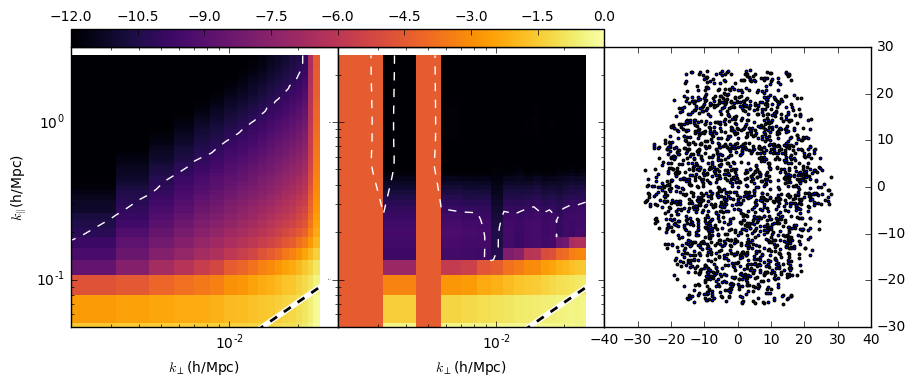

In [12]:
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8/3,.8])
ax2=fig.add_axes([.8/3.+.1,.1,.8/3.,.8])
ax3=fig.add_axes([2*.8/3.+.1,.1,.8/3.,.8])
cba=fig.add_axes([.1,.9,2*.8/3.,.05])
cubeGrid[cubeGrid==0]=1
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
wedgeLine_c=kperp_c*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
ax1.pcolor(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid/cubeGrid.max()),levels=[-10],colors=['w'])
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='w',ls='-',lw=4)
ax1.plot(kperp_c/.68,wedgeLine_c/.68,color='k',ls='--',lw=2)
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
cubeDGrid[cubeDGrid==0]=1
kperp_dt_grid,kpara_dt_grid=np.meshgrid(kperp_dt,kpara_dt)
wedgeLine_dt=kperp_dt*cosmology.wedge(cosmology.f2z(simulationDefault.f0))
pc=ax2.pcolor(kperp_dt_grid/.68,kpara_dt_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),cmap='inferno',vmin=-12,vmax=0)
ax2.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeDGrid/cubeDGrid.max()),levels=[-10],colors=['w'])
cb=fig.colorbar(pc,cax=cba,orientation='horizontal')
cba.xaxis.tick_top()
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='w',ls='-',lw=4)
ax2.plot(kperp_dt/.68,wedgeLine_dt/.68,color='k',ls='--',lw=2)
ax2.set_xlim(2e-3,3e-2)
ax2.set_ylim(5e-2,3e0)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('$k_\\perp$(h/Mpc)')
#ax2.set_ylabel('$k_{||}$(h/Mpc)')
ax2.tick_params('y',labelsize=0)
for posList in simulationDefault.positions:
    ax3.scatter(posList[:,0],posList[:,1],s=np.pi*simulationDefault.dAnt/2**2.)
ax3.yaxis.tick_right()
plt.gcf().set_size_inches((10,3.5))

/Users/aaronew/miniconda2/envs/analysis/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


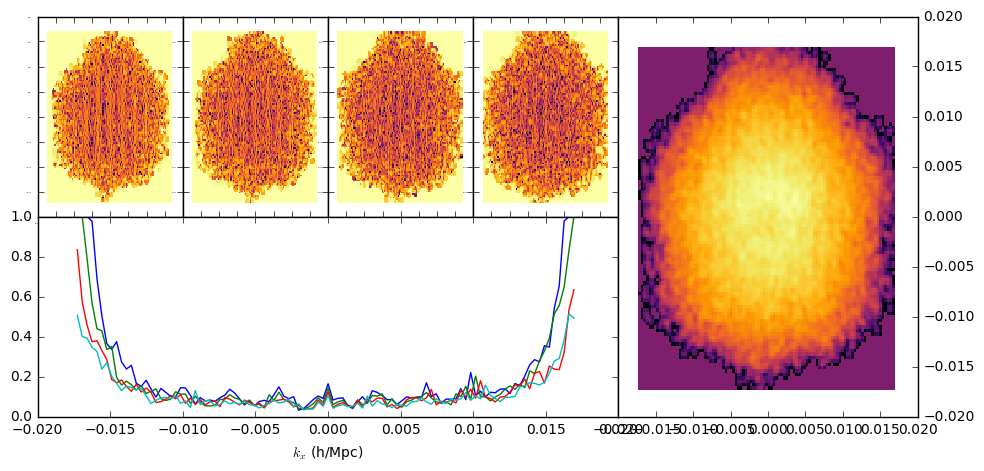

In [13]:
fig=plt.figure()
sFactorX=.66
axarr=[fig.add_axes([.1,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+2*.2*sFactorX,.5,.2*sFactorX,.4]),
        fig.add_axes([.1+3*.2*sFactorX,.5,.2*sFactorX,.4])]
laxis=fig.add_axes([.1,.1,.8*sFactorX,.4])
sampleAxis=fig.add_axes([.1+.8*sFactorX,.1,.8*(1-sFactorX),.8])
nf=len(simulationDefault.fAxis)
uA=np.arange(-simulationDefault.gridSize/2,simulationDefault.gridSize/2)*simulationDefault.gridSpacing
kA=cosmology.u2kperp(uA,cosmology.f2z(simulationDefault.f0))
kxGrid,kyGrid=np.meshgrid(kA,kA)

for sliceNum in range(4):
    sliceIndex=(sliceNum*nf)/4
    testSliceL=np.log10(np.abs(np.real(simulationDefault.dataCube[sliceIndex+2,:,:]/simulationDefault.sampleCube[sliceIndex+2,:,:])))
    testSliceL[np.logical_or(np.isnan(testSliceL),np.isinf(testSliceL))]=0.
    axarr[sliceNum].pcolor(kxGrid,kyGrid,testSliceL,vmin=-3,vmax=0,cmap='inferno')
    axarr[sliceNum].tick_params('x',labelsize=0)
    axarr[sliceNum].tick_params('y',labelsize=0)


    avgBox=(np.mean(10**testSliceL[np.logical_and(kA>-.005,kA<=.005),:],axis=0))
    laxis.plot(kA,avgBox)
laxis.set_xlabel('$k_x$ (h/Mpc)')
sSlice=simulationDefault.sampleCube[nf/2,:,:]
sSlice[sSlice==0]=1.
sampleAxis.pcolor(kxGrid,kyGrid,np.log10(sSlice/sSlice.max()),cmap='inferno',vmin=-3,vmax=0)
sampleAxis.yaxis.tick_right()
fig.set_size_inches([11,5])

compute grids for 1,10,30 days and compare on the same contour plot

In [14]:
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.)
simulationDefault.gridDays(1,2)
kperp_c,kpara_c,cubeGrid_1day=simulationDefault.getCosmologyDCubeGrid()
print '1day done'
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=10)
simulationDefault.gridDays(startDay=1,endDay=11)
kperp_c,kpara_c,cubeGrid_10day=simulationDefault.getCosmologyDCubeGrid()
print '10 day done'
simulationDefault.perturbPositions(dAp=simulationDefault.dAntPos*np.sqrt(2.)/2.,nDays=100)
simulationDefault.gridDays(startDay=1,endDay=101)
kperp_c,kpara_c,cubeGrid_30day=simulationDefault.getCosmologyDCubeGrid()
print '100 day done'

1day done
10 day done
100 day done


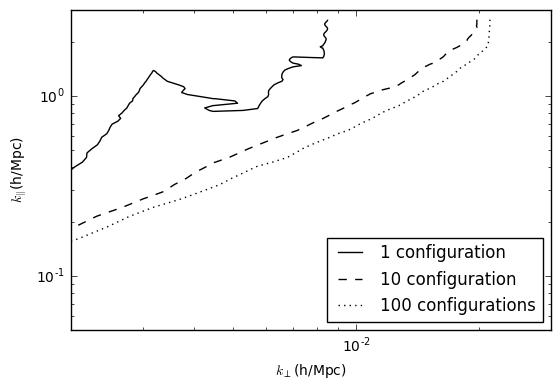

In [15]:
kperp_c_grid,kpara_c_grid=np.meshgrid(kperp_c,kpara_c)
fig=plt.figure()
ax1=fig.add_axes([.1,.1,.8,.8])
cs1=ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid_1day/cubeGrid_1day.max()),levels=[-10],colors=['k'],linestyles=['-'],labels=['1 day'])
cs2=ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid_10day/cubeGrid_10day.max()),levels=[-10],colors=['k'],linestyles=['--'],labels=['10 days'])
cs3=ax1.contour(kperp_c_grid/.68,kpara_c_grid/.68,np.log10(cubeGrid_30day/cubeGrid_30day.max()),levels=[-10],colors=['k'],linestyles=[':'],labels=['30 days'])
cs1.collections[0].set_label('1 configuration')
cs2.collections[0].set_label('10 configuration')
cs3.collections[0].set_label('100 configurations')
ax1.set_xlim(2e-3,3e-2)
ax1.set_ylim(5e-2,3e0)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('$k_\perp$(h/Mpc)')
ax1.set_ylabel('$k_{||}$(h/Mpc)')
plt.legend(loc='lower right')